# Machine Learning Project 3: Customer Segmentation

#### Project description:
In this project, I will apply related techinical skills in clustering such as K-Means, ELBOW method, PCA, ect for customer segmentation. The data used for analysis here is collected from Kaggle. Customers in the dataset will be categorized into the optimum number of groups for marketing or business purpose. This could potentially help companies to recognize target customers more efficiently and maximize profits accordingly.

## 1. K-Means, Elbow method, PCA review

### K-Means Clustering
#### (1) Definition:
K-Means clustering is a method of vector quantization that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean. This could minimize within-cluster variances.

#### (2) Cost function:
$$J_{\text{min}}(c^{(1)}, \ldots, c^{(m)}, \mu_1, \ldots, \mu_k) = \frac{1}{m} \sum_{i=1}^{m} || x^{(i)} - u_{c^{(i)}} ||^2$$

##### Where:
$m$ is the number of data points.

$c^{(i)}$ is the index ($ from\ 1\ to\ k$) of cluster centroid closest to $x^{(i)}$.

$\mu_1,\mu_2,...,\mu_k$ are the average or mean of points assigned to cluster $1,2,..,k$. They can be expressed as a vector $[\mu_1,\mu_2,...,\mu_k]$.

#### (3) Steps:
Step1: randomly initialize $k$ cluster centroids $\mu_1,\mu_2,...,\mu_k$

$Repeat\{$
 
 Step2: assigned points to cluster centroids based on $min_k||x^{(i)}-mu_k ||^2$ 

Step3: move or update cluster centroids $\}$

![Example1](Clustering.png)

### Elbow method
Elbow method is way used for determing the optimum number of cluster centroids in a dataset.This method includes plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

![Example2](Elbow-method-for-choosing-the-number-of-cluster-centers.png)

### PCA (Principal Component Analysis)

PCA is a statistical technique and is characterized by reducing the dimensionality of a large dataset with a high number of features through linearly transforming the data into a new coordinate system. This aims to increase the interpretability while preserve the maximum amount of information.

![Example3](PCA.png)

## 2. Upload libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.simplefilter("ignore")
np.random.seed(42)

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


## 3. Import data

In [55]:
customer_data=pd.read_csv("segmentation data.csv")
print("The first ten rows of the dataset:\n",customer_data.head(10))
print("The number of rows in the dataset: ",len(customer_data))

The first ten rows of the dataset:
           ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   
5  100000006    0               0   35          1  144848           0   
6  100000007    0               0   53          1  156495           1   
7  100000008    0               0   35          1  193621           2   
8  100000009    0               1   61          2  151591           0   
9  100000010    0               1   28          1  174646           2   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
5                0  
6            

#### Description of categorical features:
(1)Sex: 0 male, 1 female

(2)Marital status: 0 single, 1 non-single(divorced/separated/married/widowed)

(3)Education: 0 other/unknown, 1 high school, 2 university 3 graduate school

(4)Occupation: 0 unemployed/unskilled, 1 skilled employee/official, 2 management/self-employed/highly qualified employee/officer.

(5)Settlement size: 0 small city, 1 mid-sized city, 2 big city.

In [18]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


There is no missing value in the dataset. Regarding categorical features, we can check the number of each category.

## 4. Understand our customers

In this section, we are going to performance customer analysis. Data visualization will play an important role in understanding our customers. 

### (1) Proportion analysis

Firstly, let's check it out the number of customers in each different categories.

In [19]:
print("Total categories in the feature Sex:\n",customer_data["Sex"].value_counts(),"\n")
print("Total categories in the feature Marital status:\n",customer_data["Marital status"].value_counts(),"\n")
print("Total categories in the feature Occupation:\n",customer_data["Occupation"].value_counts(),"\n")
print("Total categories in the feature Settlement size:\n",customer_data["Settlement size"].value_counts(),"\n")
print("Total categories in the feature Education:\n",customer_data["Education"].value_counts(),"\n")

Total categories in the feature Sex:
 Sex
0    1086
1     914
Name: count, dtype: int64 

Total categories in the feature Marital status:
 Marital status
0    1007
1     993
Name: count, dtype: int64 

Total categories in the feature Occupation:
 Occupation
1    1113
0     633
2     254
Name: count, dtype: int64 

Total categories in the feature Settlement size:
 Settlement size
0    989
1    544
2    467
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64 



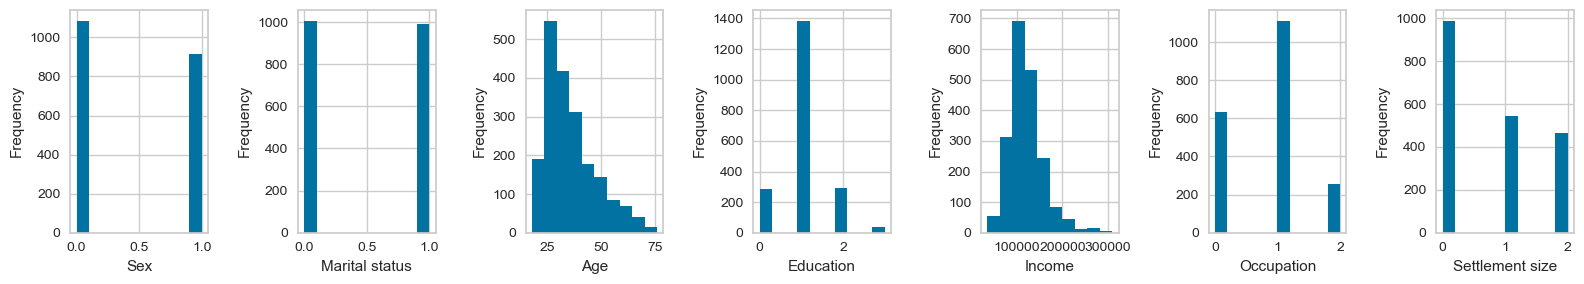

In [28]:
# alternatively, we can also display them in histograms.
columns=["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]
fig,axes=plt.subplots(1,7,figsize=(16,3))
axes=axes.flatten()
for i,feature in enumerate(columns):
    ax=axes[i]
    ax.hist(customer_data.loc[:,feature],density=False)
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()


In [48]:
age_range=len(customer_data[(customer_data["Age"]>25) & (customer_data["Age"]<50)]) 
age_25_to_50_prop=age_range/len(customer_data)
print(f"The proportion of customers aged between 25 to 50 is {age_25_to_50_prop*100:.2f}%")

high_school_grads=len(customer_data[customer_data["Education"]==1])
high_school_grads_prop=high_school_grads/len(customer_data)
print(f"The proportion of customers with high school degree is {high_school_grads_prop*100:.2f}%")


income_range=len(customer_data[(customer_data["Income"]>100000) & (customer_data["Income"]<200000)])
income_prop=income_range/len(customer_data)
print(f"The proportion of customers who earn between 100,000 to 200,000 yearly is {income_prop*100:.2f}%")

skilled_employees=len(customer_data[customer_data["Occupation"]==1])
skilled_employees_prop=skilled_employees/len(customer_data)
print(f"The proportion of skilled employees is {skilled_employees_prop*100:.2f}%")

small_city_inhabitants=len(customer_data[customer_data["Settlement size"]==0])
small_city_inhabitants_prop=small_city_inhabitants/len(customer_data)
print(f"The proportion of small city inhabitants is {small_city_inhabitants_prop*100:.2f}%")


The proportion of customers aged between 25 to 50 is 68.35%
The proportion of customers with high school degree is 69.30%
The proportion of customers who earn between 100,000 to 200,000 yearly is 68.45%
The proportion of skilled employees is 55.65%
The proportion of small city inhabitants is 49.45%


#### Conclusion: 
based on the histograms of 7 features except ID and value_counts , we can make the following conclusion based on observation and calculation
(1) The ratio of men to women is still balanced.

(2) Those who are single and those who are non-single both comprise roughly half of the dataset.

(3) Most of our customers are aged between 25 and 50.

(4) The majority of our customers graduate from high school.

(5) Most customers' income falls into 10,000-20,000 category.

(6) Over half of our customers are skilled employees.

(7) Nearly half of them live in small cities.

### (2) Correlation analysis

Since each feature could have certain correlation with each other, let's plot heatmap to visualize the direction and strength of their relationship.

In [56]:
# let's remove the column ID
customer_data.drop(columns="ID",inplace=True)
print(customer_data.head(10))

   Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1
5    0               0   35          1  144848           0                0
6    0               0   53          1  156495           1                1
7    0               0   35          1  193621           2                1
8    0               1   61          2  151591           0                0
9    0               1   28          1  174646           2                0


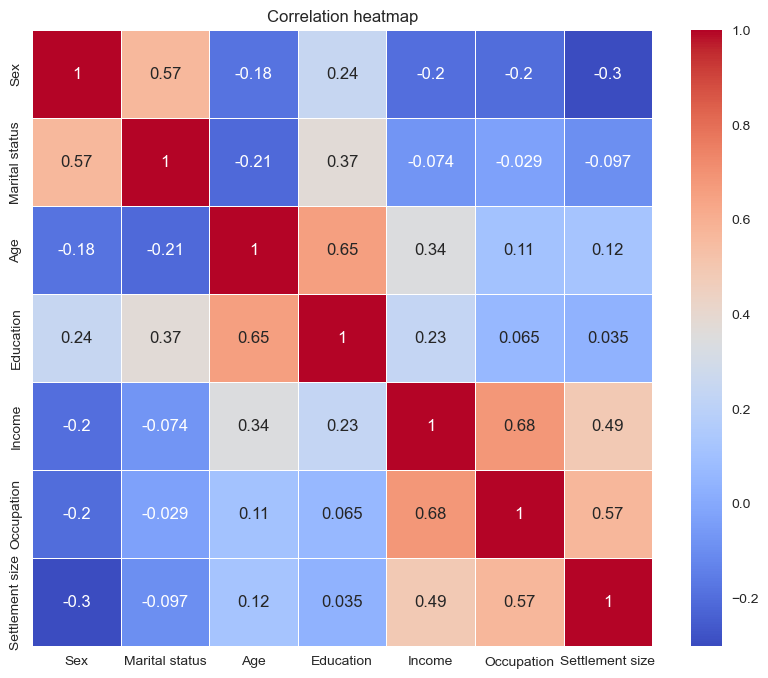

In [58]:
x_features=["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]
correlation_matrix=customer_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=0.5,xticklabels=x_features,yticklabels=x_features)
plt.title("Correlation heatmap")
plt.show()

#### Conclusion: 
Four pairs show strong correlation: 

(1) Maritle status and sex

(2) Education and Age: people with better education background tend to be older.

(3) Income and Occupation: jobs that require higher skills tend to generate more economic value.

(4) Income and Settlement size: bigger cities tend to offer higher income.


### (3) Analysis with pie charts and bar charts

Here we will focus on analyzing the last three pairs: Eudcation and Age, Income and Occupation, Income and Settlement size to further quantitative analysis. Remember in the proportion analysis part that most of our customers are aged between 25 and 50, have high school degree, earn between 100,000 USD dollars and 200,000 USD dollars, are skilled employees and live in small cities.

#### Education and Age

In [98]:
# threshold for age: 0-25,25-50,over 50
unknown_education=len(customer_data[customer_data["Education"]==0])/len(customer_data)
high_school_grads_prop
unversity_grads_prop=len(customer_data[customer_data["Education"]==2])/len(customer_data)
graduate_prop=len(customer_data[customer_data["Education"]==3])/len(customer_data)

# proportions of different education backgroud
education_prop=[unknown_education,high_school_grads_prop,unversity_grads_prop,graduate_prop]
education_labels=["Unknow","High school","Bachelor","Master"]
print(f"Respective proportions of people with unknown education degree, high school degree, bachelor degree, and master degree: {[f'{i*100:.2f}%' for i in education_prop]}")

# people with high school degree
high_school_0_25=len(customer_data[(customer_data["Education"]==1) & (customer_data["Age"]<25)])/len(customer_data[customer_data["Education"]==1])
high_school_25_50=len(customer_data[(customer_data["Education"]==1) & (customer_data["Age"]>25) & (customer_data["Age"]<50)])/len(customer_data[customer_data["Education"]==1])
high_school_50_=len(customer_data[(customer_data["Education"]==1) & (customer_data["Age"]>50)])/len(customer_data[customer_data["Education"]==1])
age_group_high_school=[high_school_0_25,high_school_25_50,high_school_50_]
print(f"The respective proportions of people with high school degree younger than 25, between 25 and 50 and over 50: {[f'{i*100:.2f}%' for i in age_group_high_school]}")

Respective proportions of people with unknown education degree, high school degree, bachelor degree, and master degree: ['14.35%', '69.30%', '14.55%', '1.80%']
The respective proportions of people with high school degree younger than 25, between 25 and 50 and over 50: ['15.37%', '75.04%', '3.90%']


In [100]:
# people with bachelor degree
bachelor_0_25=len(customer_data[(customer_data["Education"]==2) & (customer_data["Age"]<25)])/len(customer_data[customer_data["Education"]==2])
bachelor_25_50=len(customer_data[(customer_data["Education"]==2) & (customer_data["Age"]>25) & (customer_data["Age"]<50)])/len(customer_data[customer_data["Education"]==2])
bachelor_50_=len(customer_data[(customer_data["Education"]==2) & (customer_data["Age"]>50)])/len(customer_data[customer_data["Education"]==2])
age_group_bachelor=[bachelor_0_25,bachelor_25_50,bachelor_50_]
print(f"The respective proportions of people with bachelor degree younger than 25, between 25 and 50 and over 50: {[f'{i*100:.2f}%' for i in age_group_bachelor]}")

The respective proportions of people with bachelor degree younger than 25, between 25 and 50 and over 50: ['0.00%', '39.52%', '58.08%']


In [101]:
# People with master degree
master_0_25=len(customer_data[(customer_data["Education"]==3) & (customer_data["Age"]<25)])/len(customer_data[customer_data["Education"]==3])
master_25_50=len(customer_data[(customer_data["Education"]==3) & (customer_data["Age"]>25) & (customer_data["Age"]<50)])/len(customer_data[customer_data["Education"]==3])
master_50_=len(customer_data[(customer_data["Education"]==3) & (customer_data["Age"]>50)])/len(customer_data[customer_data["Education"]==3])
age_group_master=[master_0_25,master_25_50,master_50_]
print(f"The respective proportions of people with master degree younger than 25, between 25 and 50 and over 50: {[f'{i*100:.2f}%' for i in age_group_master]}")

The respective proportions of people with master degree younger than 25, between 25 and 50 and over 50: ['0.00%', '27.78%', '69.44%']


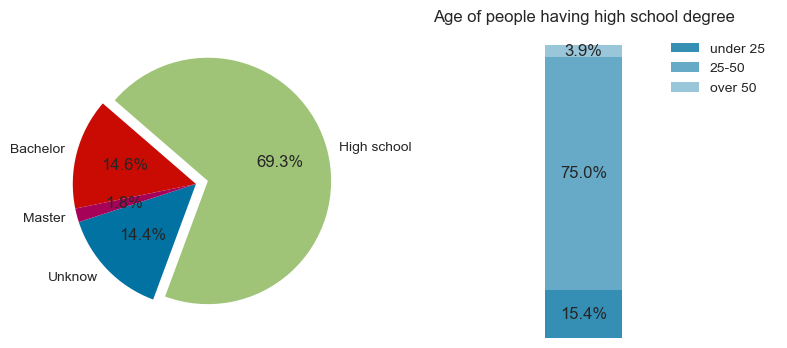

In [108]:
# Data visualization
education_prop=[unknown_education,high_school_grads_prop,unversity_grads_prop,graduate_prop]
education_labels=["Unknow","High school","Bachelor","Master"]

age_labels=["under 25","25-50","over 50"]
age_group_high_school=[high_school_0_25,high_school_25_50,high_school_50_]
age_group_bachelor=[bachelor_0_25,bachelor_25_50,bachelor_50_]
age_group_master=[master_0_25,master_25_50,master_50_]


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
fig.subplots_adjust(wspace=0)
explode1=[0,0.1,0,0]
angle1=-180*0.9

bottom=0
width=0.2
ax1.pie(education_prop,labels=education_labels,startangle=angle1,explode=explode1,autopct="%1.1f%%")
for i,(ratio,age) in enumerate(zip(age_group_high_school,age_labels)):
    b1=ax2.bar(0,ratio,width=width,bottom=bottom,alpha=0.8+i*(-0.2),color="C0",label=age)
    ax2.bar_label(b1,labels=[f"{ratio*100:.1f}%"],label_type="center")
    bottom+=ratio

ax2.set_xlim(-2.5*width,2.5*width)
ax2.set_title("Age of people having high school degree")
ax2.axis("off")
ax2.legend()
plt.show()



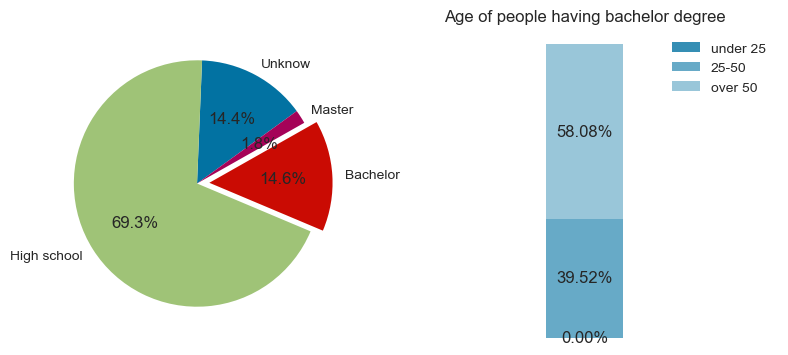

In [116]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
fig.subplots_adjust(wspace=0)
explode2=[0,0,0.1,0]
angle2=-180*1.8

bottom=0
width=0.2
ax1.pie(education_prop,labels=education_labels,startangle=angle2,explode=explode2,autopct="%1.1f%%")
for i,(ratio,age) in enumerate(zip(age_group_bachelor,age_labels)):
    b1=ax2.bar(0,ratio,width=width,bottom=bottom,alpha=0.8+i*(-0.2),color="C0",label=age)
    ax2.bar_label(b1,labels=[f"{ratio*100:.2f}%"],label_type="center")
    bottom+=ratio

ax2.set_xlim(-2.5*width,2.5*width)
ax2.set_title("Age of people having bachelor degree")
ax2.axis("off")
ax2.legend()
plt.show()

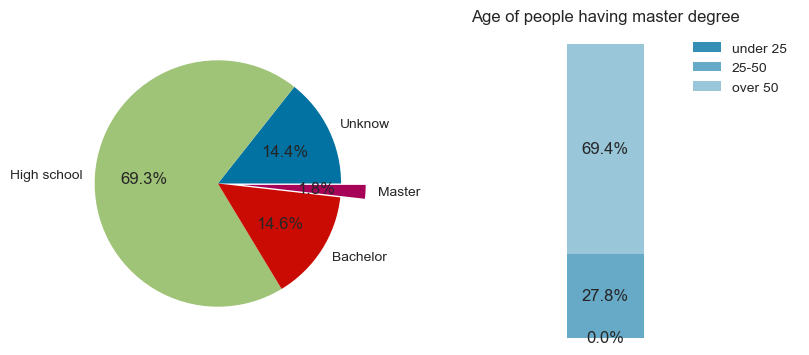

In [120]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
fig.subplots_adjust(wspace=0)
explode3=[0,0,0,0.2]
angle3=-180*2.0

bottom=0
width=0.2
ax1.pie(education_prop,labels=education_labels,startangle=angle3,explode=explode3,autopct="%1.1f%%")
for i,(ratio,age) in enumerate(zip(age_group_master,age_labels)):
    b1=ax2.bar(0,ratio,width=width,bottom=bottom,alpha=0.8+i*(-0.2),color="C0",label=age)
    ax2.bar_label(b1,labels=[f"{ratio*100:.1f}%"],label_type="center")
    bottom+=ratio

ax2.set_xlim(-2.5*width,2.5*width)
ax2.set_title("Age of people having master degree")
ax2.axis("off")
ax2.legend()
plt.show()

#### Income and occupation

In [135]:
# threshold for income: lower than $100,000, between $100,000 and $200,000, higher than $200,000

# unemployed and unskilled employees
bottom_group_income=len(customer_data[(customer_data["Occupation"]==0) & (customer_data["Income"]<100000)])/len(customer_data[customer_data["Occupation"]==0])
middle_group_income=len(customer_data[(customer_data["Occupation"]==0) & (customer_data["Income"]>100000)] & (customer_data["Income"]<200000))/len(customer_data[customer_data["Occupation"]==0])
top_group_income=len(customer_data[(customer_data["Occupation"]==0) & (customer_data["Income"]>200000)])/len(customer_data[customer_data["Occupation"]==0])

unemployed_unskill_income_prop=[bottom_group_income,middle_group_income,top_group_income]
print(f"The respective proportions of unemployed/unskilled employees who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: {[f'{i*100:.2f}%' for i in unemployed_unskill_income_prop]}")

The respective proportions of unemployed/unskilled employees who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: ['68.09%', '31.91%', '0.00%']


In [155]:
# skilled employees
bottom_group_income2=len(customer_data[(customer_data["Occupation"]==1) & (customer_data["Income"]<100000)])/len(customer_data[customer_data["Occupation"]==1])
middle_group_income2=len(customer_data[(customer_data["Occupation"]==1) & (customer_data["Income"]>100000) & (customer_data["Income"]<200000)])/len(customer_data[customer_data["Occupation"]==1])
top_group_income2=len(customer_data[(customer_data["Occupation"]==1) & (customer_data["Income"]>200000)])/len(customer_data[customer_data["Occupation"]==1])

skilled_income_prop=[bottom_group_income2,middle_group_income2,top_group_income2]
print(f"The respective proportions of skilled workers who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: {[f'{i*100:.2f}%' for i in skilled_income_prop]}")

The respective proportions of skilled workers who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: ['10.33%', '88.41%', '1.26%']


In [163]:
# others: management-oriented, highly skilled, self-employed
bottom_group_income3=len(customer_data[(customer_data["Occupation"]==2) & (customer_data["Income"]<100000)])/len(customer_data[customer_data["Occupation"]==2])
middle_group_income3=len(customer_data[(customer_data["Occupation"]==2) & (customer_data["Income"]>100000) & (customer_data["Income"]<200000)])/len(customer_data[customer_data["Occupation"]==2])
top_group_income3=len(customer_data[(customer_data["Occupation"]==2) & (customer_data["Income"]>200000)])/len(customer_data[customer_data["Occupation"]==2])

other_income_prop=[bottom_group_income3,middle_group_income3,top_group_income3]
print(f"The respective proportions of highly skilled/self-employed workers or managers who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: {[f'{i*100:.2f}%' for i in other_income_prop]}")

The respective proportions of highly skilled/self-employed workers or managers who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: ['2.36%', '72.05%', '25.59%']


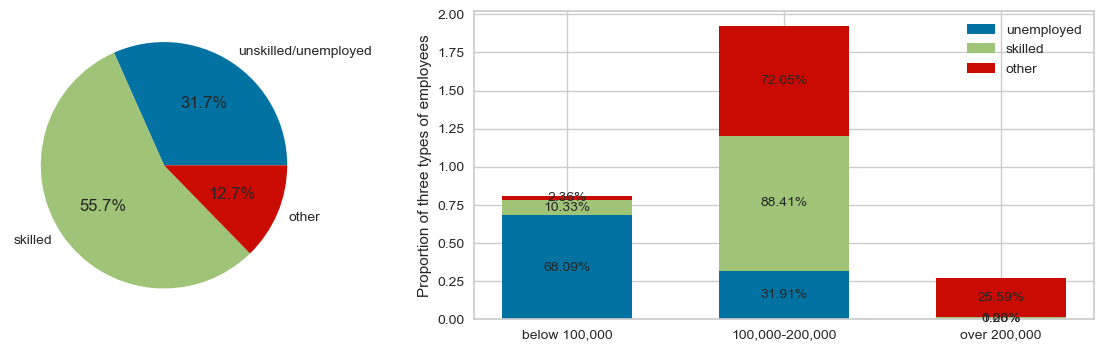

In [184]:
# Data visualization
prop_unskilled=len(customer_data[customer_data["Occupation"]==0])/len(customer_data)
prop_skilled=len(customer_data[customer_data["Occupation"]==1])/len(customer_data)
prop_other=len(customer_data[customer_data["Occupation"]==2])/len(customer_data)
worker_types=[prop_unskilled,prop_skilled,prop_other]
labels_workers=["below 100,000","100,000-200,000","over 200,000"]

income_dict={"unemployed":[bottom_group_income,middle_group_income,top_group_income],
            "skilled":[bottom_group_income2,middle_group_income2,top_group_income2],
            "other":[bottom_group_income3,middle_group_income3,top_group_income3]}

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
fig.subplots_adjust(wspace=0)

# pie chart
ax1.pie(worker_types,labels=["unskilled/unemployed","skilled","other"],autopct="%1.1f%%")

# stacked bar chart
bottom=np.zeros(len(labels_workers))
for cate,prop in income_dict.items():
    formatted_labels = [f"{p * 100:.2f}%" for p in prop]
    b=ax2.bar(labels_workers,prop,label=cate,width=0.6,bottom=bottom)
    ax2.bar_label(b,labels=formatted_labels,label_type="center",fontsize=10) 
    bottom+=prop

ax2.set_ylabel("Proportion of three types of employees")
ax2.legend()
plt.show()

#### Income and Settlement size

In [170]:
# people living in small cities
bottom_prop=len(customer_data[(customer_data["Settlement size"]==0) & (customer_data["Income"]<100000)])/len(customer_data[customer_data["Settlement size"]==0])
middle_prop=len(customer_data[(customer_data["Settlement size"]==0) & (customer_data["Income"]>100000) & (customer_data["Income"]<200000)])/len(customer_data[customer_data["Settlement size"]==0])
top_prop=len(customer_data[(customer_data["Settlement size"]==0) & (customer_data["Income"]>200000)])/len(customer_data[customer_data["Settlement size"]==0])

small_settlement_prop=[bottom_prop,middle_prop,top_prop]
print(f"Proportions of small city inhabitants who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: {[f'{i*100:.2f}%' for i in small_settlement_prop]}")

Proportions of small city inhabitants who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: ['48.03%', '51.57%', '0.40%']


In [169]:
# people living in middle cities
bottom_prop2=len(customer_data[(customer_data["Settlement size"]==1) & (customer_data["Income"]<100000)])/len(customer_data[customer_data["Settlement size"]==1])
middle_prop2=len(customer_data[(customer_data["Settlement size"]==1) & (customer_data["Income"]>100000) & (customer_data["Income"]<200000)])/len(customer_data[customer_data["Settlement size"]==1])
top_prop2=len(customer_data[(customer_data["Settlement size"]==1) & (customer_data["Income"]>200000)])/len(customer_data[customer_data["Settlement size"]==1])

middle_settlement_prop=[bottom_prop2,middle_prop2,top_prop2]
print(f"Proportions of middle city inhabitants who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: {[f'{i*100:.2f}%' for i in middle_settlement_prop]}")

Proportions of middle city inhabitants who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: ['7.35%', '87.13%', '5.51%']


In [172]:
# people living in big cities
bottom_prop3=len(customer_data[(customer_data["Settlement size"]==2) & (customer_data["Income"]<100000)])/len(customer_data[customer_data["Settlement size"]==2])
middle_prop3=len(customer_data[(customer_data["Settlement size"]==2) & (customer_data["Income"]>100000) & (customer_data["Income"]<200000)])/len(customer_data[customer_data["Settlement size"]==2])
top_prop3=len(customer_data[(customer_data["Settlement size"]==2) & (customer_data["Income"]>200000)])/len(customer_data[customer_data["Settlement size"]==2])

big_settlement_prop=[bottom_prop3,middle_prop3,top_prop3]
print(f"Proportions of big city inhabitants who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: {[f'{i*100:.2f}%' for i in big_settlement_prop]}")

Proportions of big city inhabitants who earn lower than $100,000, between $100,000 and $200,000 and higher than $200,000 is: ['7.92%', '82.44%', '9.64%']


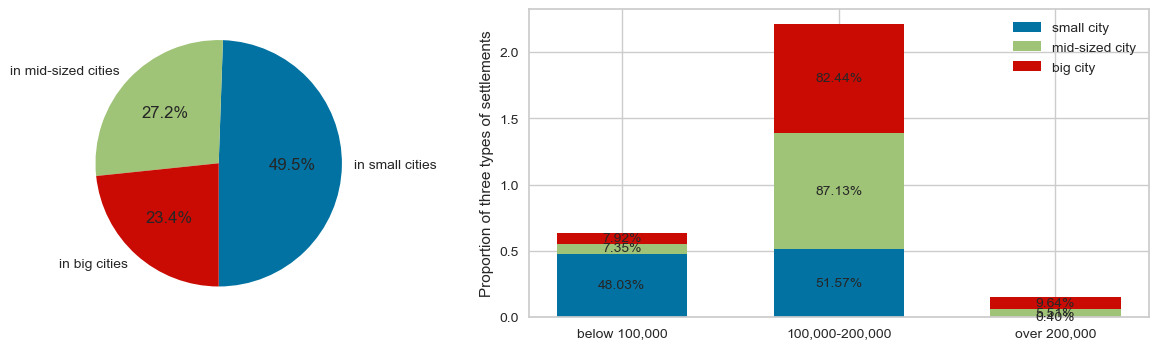

In [182]:
# data visualization
prop_small=len(customer_data[customer_data["Settlement size"]==0])/len(customer_data)
prop_middle=len(customer_data[customer_data["Settlement size"]==1])/len(customer_data)
prop_big=len(customer_data[customer_data["Settlement size"]==2])/len(customer_data)
settlement_types=[prop_small,prop_middle,prop_big]
labels_settlement=["below 100,000","100,000-200,000","over 200,000"]

settlement_dict={"small city":[bottom_prop,middle_prop,top_prop],
            "mid-sized city":[bottom_prop2,middle_prop2,top_prop2],
            "big city":[bottom_prop3,middle_prop3,top_prop3]}

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
fig.subplots_adjust(wspace=0)

# pie chart
ax1.pie(settlement_types,labels=["in small cities","in mid-sized cities","in big cities"],autopct="%1.1f%%",startangle=-180*0.5)

# stacked bar chart
bottom=np.zeros(len(labels_settlement))
for cate,prop in settlement_dict.items():
    formatted_labels = [f"{p * 100:.2f}%" for p in prop]
    b=ax2.bar(labels_settlement,prop,label=cate,width=0.6,bottom=bottom)
    ax2.bar_label(b,labels=formatted_labels,label_type="center",fontsize=10) 
    bottom+=prop

ax2.set_ylabel("Proportion of three types of settlements")
ax2.legend()
plt.show()

#### Conclusion
1. Customers with higher education background tend to be older. Among people graduated from high school, 75% of them are between 25 and 50. Regarding people with bachelor degree, roughly 58% are over 50 years old. However, this number for those with master degree is even higher, reaching 69.4%.

2. The majority of our customers with skills fall into 100,000-200,000 USD dollars category. The ratios for those who are skilled and employed and those who are managers, self-employed and highly skilled are 88.41% and 72.05% respectively.

3. Customers living in bigger cities tend to earn more. There are 51.57% of small city inhabitants earning between 100,000-200,000 USD dollars per year. The percentage in mid-sized and big cities, however, is much higher, at 87.13% and 82.44% respectively. Moreover, we are more likely to witness customers earning top income. This number in big cities is 9.64%, compared with 5.51% and 0.4% in mid-sized and small cities. 

## 5. Data processing

Now let's perform data scaling

In [222]:
customer_data2=customer_data.copy()

In [185]:
scaler=StandardScaler()
scaler.fit(customer_data)
customer_data=pd.DataFrame(scaler.transform(customer_data),columns=customer_data.columns)
print("The first ten rows in the new dataset:\n",customer_data.head(10))

The first ten rows in the new dataset:
         Sex  Marital status       Age  Education    Income  Occupation  \
0 -0.917399       -0.993024  2.653614   1.604323  0.097524    0.296823   
1  1.090038        1.007025 -1.187132  -0.063372  0.782654    0.296823   
2 -0.917399       -0.993024  1.117316  -0.063372 -0.833202   -1.269525   
3 -0.917399       -0.993024  0.775916  -0.063372  1.328386    0.296823   
4 -0.917399       -0.993024  1.458716  -0.063372  0.736932    0.296823   
5 -0.917399       -0.993024 -0.077583  -0.063372  0.627140   -1.269525   
6 -0.917399       -0.993024  1.458716  -0.063372  0.932841    0.296823   
7 -0.917399       -0.993024 -0.077583  -0.063372  1.907295    1.863171   
8 -0.917399        1.007025  2.141515   1.604323  0.804125   -1.269525   
9 -0.917399        1.007025 -0.675033  -0.063372  1.409254    1.863171   

   Settlement size  
0         1.552326  
1         1.552326  
2        -0.909730  
3         0.321298  
4         0.321298  
5        -0.909730 

## 6. Reduce dimensionality 

We will perform PCA to reduce the number of features to 3.

In [189]:
pca=PCA(n_components=3)
pca.fit(customer_data)
customer_data_pca=pd.DataFrame(pca.transform(customer_data),columns=(["feature1","feature2","feature3"]))
print("The first ten rows of the dataset after we perform PCA:\n",customer_data_pca.head(10))
print("Description of the dataset:\n",customer_data_pca.describe())

The first ten rows of the dataset after we perform PCA:
    feature1  feature2  feature3
0  2.514746  0.834122  2.174806
1  0.344935  0.598146 -2.211603
2 -0.651063 -0.680093  2.280419
3  1.714316 -0.579927  0.730731
4  1.626745 -0.440496  1.244909
5 -0.274734 -0.871070  1.310152
6  1.729504 -0.416069  1.212454
7  2.510377 -0.751256 -0.504917
8  0.419891  1.936115  2.209117
9  1.098729  0.111131 -1.306561
Description of the dataset:
            feature1      feature2      feature3
count  2.000000e+03  2.000000e+03  2.000000e+03
mean  -2.842171e-17  2.842171e-17  1.421085e-17
std    1.581137e+00  1.355907e+00  1.148102e+00
min   -3.013400e+00 -2.591659e+00 -3.147124e+00
25%   -1.157841e+00 -8.963280e-01 -8.670746e-01
50%   -1.613535e-01 -3.433384e-02 -1.177480e-01
75%    1.099267e+00  7.976746e-01  7.977950e-01
max    5.551561e+00  4.434576e+00  4.039386e+00


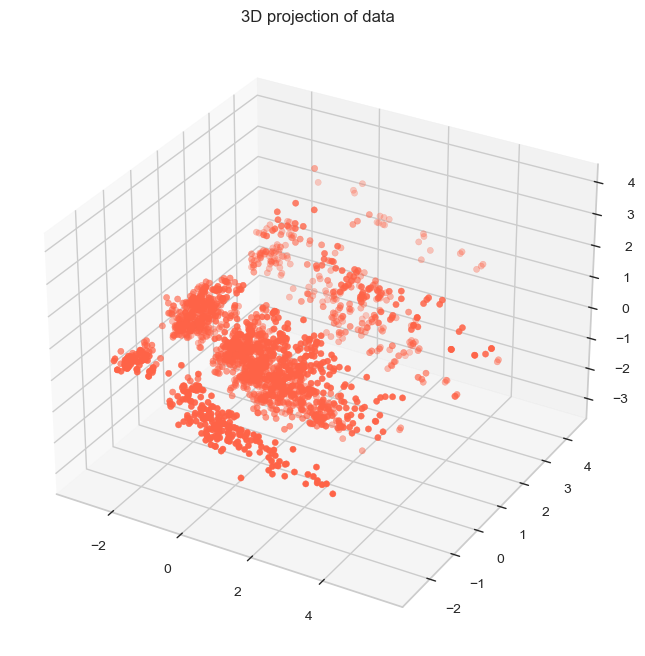

In [195]:
# 3D projection of the new dateset
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(customer_data_pca.loc[:,"feature1"],customer_data_pca.loc[:,"feature2"],customer_data_pca.loc[:,"feature3"],
          color="tomato",marker="o")
ax.set_title("3D projection of data")
plt.show()

## 7. Apply Elbow method for clustering

In this section, we will apply Elbow method to determine the optimal number of cluster centroids.

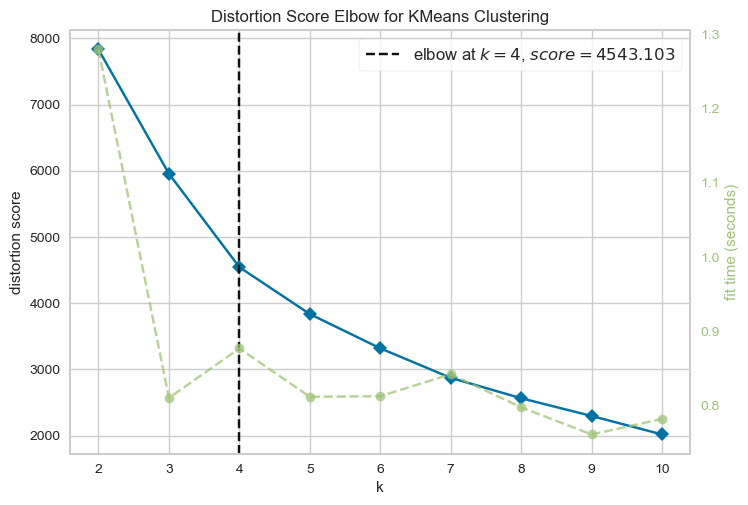

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [196]:
Elbow=KElbowVisualizer(KMeans(),k=10)
Elbow.fit(customer_data_pca)
Elbow.show()

Based on the chart above, it seems ideal if we set the number of cluster centroids to 4. In the next step, we are going to use the Agglomerative Clustering Model to fit the data.

In [223]:
AC_model=AgglomerativeClustering(n_clusters=4) #build model
AC_model_predict=AC_model.fit_predict(customer_data_pca) #fit data to model and predict
customer_data_pca["Predicted clusters"]=AC_model_predict
customer_data2["Predicted clusters"]=AC_model_predict
print("Let's print the the first ten rows to see which cluster each point falls into:\n ",customer_data_pca.head(10))

Let's print the the first ten rows to see which cluster each point falls into:
     feature1  feature2  feature3  Predicted clusters
0  2.514746  0.834122  2.174806                   0
1  0.344935  0.598146 -2.211603                   1
2 -0.651063 -0.680093  2.280419                   3
3  1.714316 -0.579927  0.730731                   2
4  1.626745 -0.440496  1.244909                   2
5 -0.274734 -0.871070  1.310152                   2
6  1.729504 -0.416069  1.212454                   2
7  2.510377 -0.751256 -0.504917                   2
8  0.419891  1.936115  2.209117                   0
9  1.098729  0.111131 -1.306561                   2


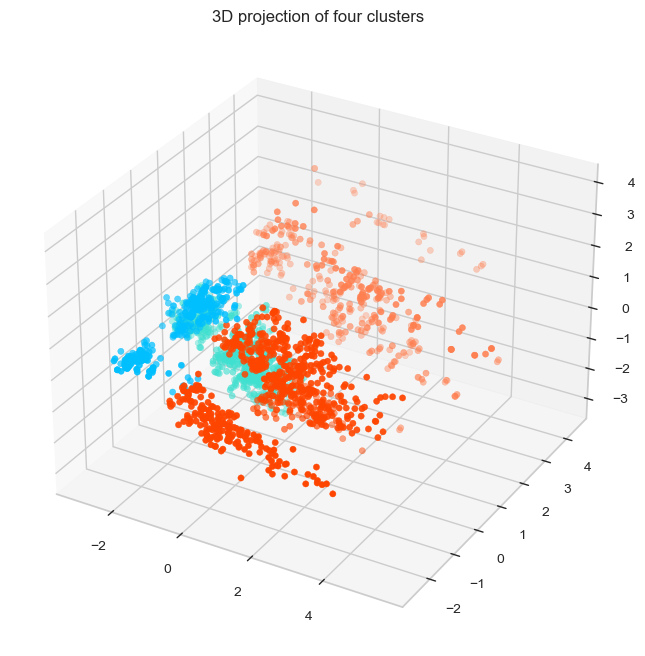

In [211]:
# let's make a 3D plot to display the result.
fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection="3d")
ax.scatter(customer_data_pca.loc[:,"feature1"],customer_data_pca.loc[:,"feature2"],customer_data_pca.loc[:,"feature3"],
          marker="o",c=customer_data_pca["Predicted clusters"],cmap=ListedColormap(["coral","orangered","turquoise","deepskyblue"]))
ax.set_title("3D projection of four clusters")
plt.show()

## 8. Evaluate model

Let's visualize the number of points in each cluster centroid

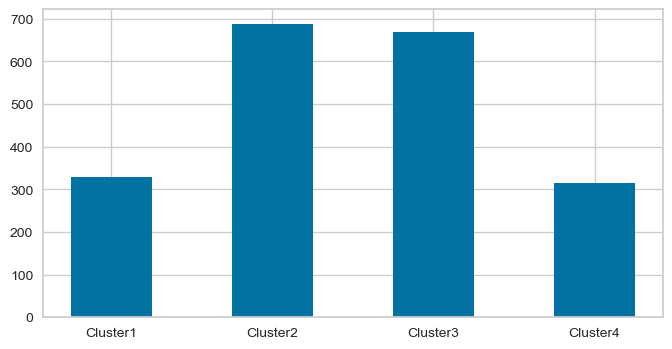

In [215]:
num_cluster1=len(customer_data_pca[customer_data_pca["Predicted clusters"]==0])
num_cluster2=len(customer_data_pca[customer_data_pca["Predicted clusters"]==1])
num_cluster3=len(customer_data_pca[customer_data_pca["Predicted clusters"]==2])
num_cluster4=len(customer_data_pca[customer_data_pca["Predicted clusters"]==3])
clusters=[num_cluster1,num_cluster2,num_cluster3,num_cluster4]
labels=["Cluster1","Cluster2","Cluster3","Cluster4"]

fig,ax=plt.subplots(1,1,figsize=(8,4))
ax.bar(labels,clusters,width=0.5,bottom=0)
plt.show()

## 9. Customer profile

Now let's see who these customers are based on four clusters.

#### Cluster one

The number of customers belonging to cluster one is  329


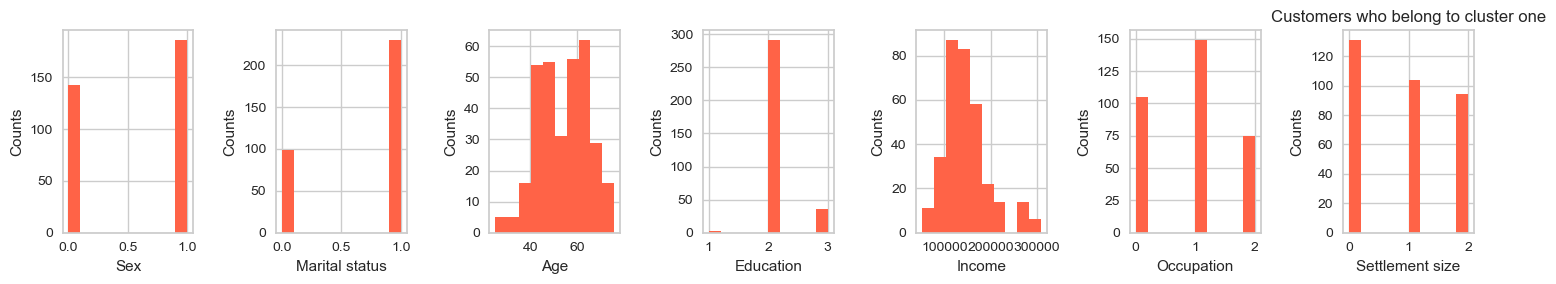

In [235]:
cluster_one=customer_data2[customer_data2["Predicted clusters"]==0]
num_cluster_one=len(cluster_one)
print("The number of customers belonging to cluster one is ",num_cluster_one)

columns=["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]

fig,axes=plt.subplots(1,7,figsize=(15,3))
axes=axes.flatten()
for i,feature in enumerate(columns):
    ax=axes[i]
    ax.hist(cluster_one.loc[:,feature],density=False,color="tomato")
    ax.set_xlabel(feature)
    ax.set_ylabel("Counts")
ax.set_title("Customers who belong to cluster one")
plt.tight_layout()
plt.show()

### Cluster two

The number of customers belonging to cluster two is  669


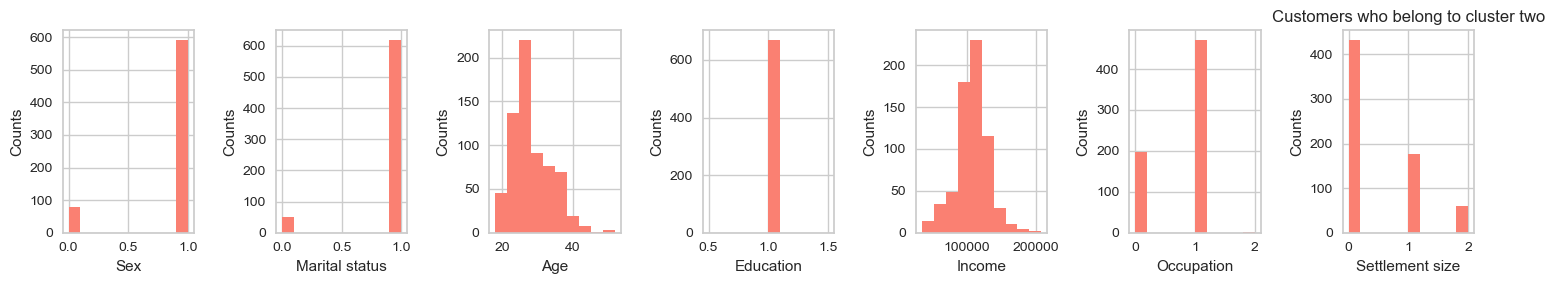

In [237]:
cluster_two=customer_data2[customer_data2["Predicted clusters"]==1]
num_cluster_two=len(cluster_two)
print("The number of customers belonging to cluster two is ",num_cluster_two)

columns=["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]

fig,axes=plt.subplots(1,7,figsize=(15,3))
axes=axes.flatten()
for i,feature in enumerate(columns):
    ax=axes[i]
    ax.hist(cluster_two.loc[:,feature],density=False,color="salmon")
    ax.set_xlabel(feature)
    ax.set_ylabel("Counts")
ax.set_title("Customers who belong to cluster two")
plt.tight_layout()
plt.show()

### Cluster three

The number of customers belonging to cluster three is  688


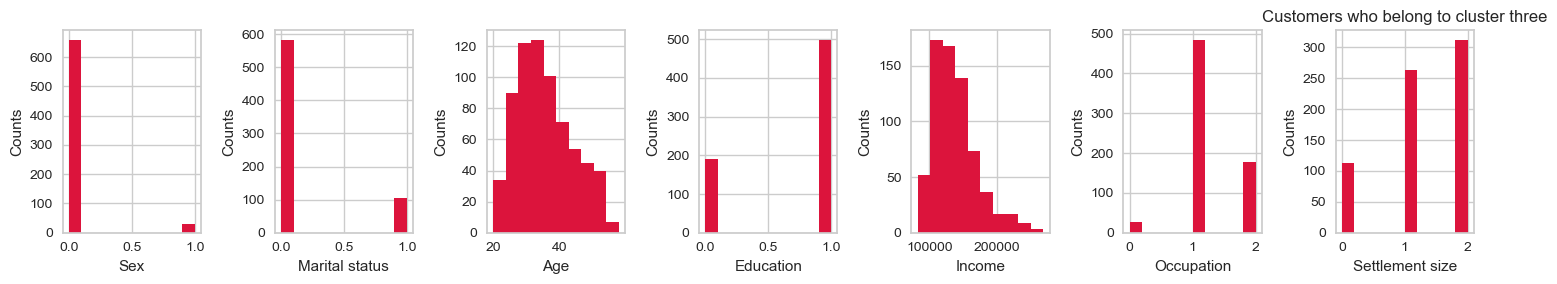

In [239]:
cluster_three=customer_data2[customer_data2["Predicted clusters"]==2]
num_cluster_three=len(cluster_three)
print("The number of customers belonging to cluster three is ",num_cluster_three)

columns=["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]

fig,axes=plt.subplots(1,7,figsize=(15,3))
axes=axes.flatten()
for i,feature in enumerate(columns):
    ax=axes[i]
    ax.hist(cluster_three.loc[:,feature],density=False,color="crimson")
    ax.set_xlabel(feature)
    ax.set_ylabel("Counts")
ax.set_title("Customers who belong to cluster three")
plt.tight_layout()
plt.show()

### Cluster four

The number of customers belonging to cluster four is  314


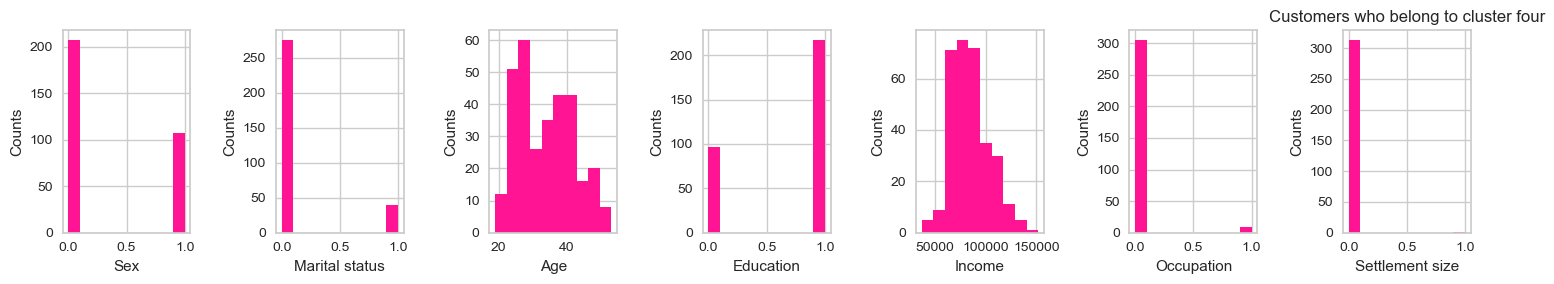

In [240]:
cluster_four=customer_data2[customer_data2["Predicted clusters"]==3]
num_cluster_four=len(cluster_four)
print("The number of customers belonging to cluster four is ",num_cluster_four)

columns=["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]

fig,axes=plt.subplots(1,7,figsize=(15,3))
axes=axes.flatten()
for i,feature in enumerate(columns):
    ax=axes[i]
    ax.hist(cluster_four.loc[:,feature],density=False,color="deeppink")
    ax.set_xlabel(feature)
    ax.set_ylabel("Counts")
ax.set_title("Customers who belong to cluster four")
plt.tight_layout()
plt.show()

### Conclusion of customers

### Cluster one: 
#### Key words: non-single, older, highly educated, high income
(1) Most of them are non-single.

(2) Aged between 40-60. According to our analysis in part four, customers in this age group are more likely to have bachelor or master degree. This is proven to 
be true by the fourth histogram in Cluster one.

(3) This group of customers tend to have higher income. Most of then earn 100,000 to 200,000 USD dollars per year. This is proven to be true by analysis in part four.

(4) They tend to be skilled more highly skilled employees.

(5) We see a balanced distribution of this group of customers in small, mid-sized and big cities.

### Cluster two:
#### Key words: non-single, young female, high school, middle income, small cities
(1) Most of them are non-single and young females between 20 and 30 and have high school degree.

(2) They approximately earn 100,000 dollars per year and are employed as skilled workers.

(3) Most of them live in small cities.

### Cluster three:
#### Key words: single, male, young, middle to high income, big cities, skilled or highly skilled, educated
(1) Most of them are non-single males aged between 20 to 40. 

(2) A high proportion of them have bachelor or master degree, which means they are highly education.

(3) Most of them skilled or highly skilled employees living in mid-size and big cities.

(4) A large number of these customers earn between 100,000 and 17,000 USD dollars per year.

### Cluster four:
#### Key words: single, young, small cities, high school, lower middle income, unemployed/unskilled
(1) Most of this group of customers are single young people with high school degree.

(2) Strikingly, all of them live in small cities and are unemployed/unskilled.

(3) Their yearly income falls into lower to middle category.

## 11. Marketing/ business strategy

(1) Based on statistical analysis all above, companies should focus on customers in cluster one and cluster three to maximize their profits since these two groups of customers have higher purchasing power than others.

(2) Companies should customize products or services for target customers. For example, high-quality dating apps may win popularity among customers in cluster three. Since customers in cluster one generally have high income and are older, highly educated and non-single, financial products, health care services, health-related gadgets, luxury products may cater to them. Regarding cluster four, we could recommend online course websites or job-seeking oriented applications that could upskill them.

## 12. Conclusion
In this project, I performed unsupervised machine leanring -- clustering to analyze customer information given in the dataset. PCA and KMeans are applied to split customers and plots are provided to better understand our customer groups. Hope this project could help companies better target customers.